# Unsupervised Lab Session

## Learning outcomes:
- Exploratory data analysis and data preparation for model building.
- PCA for dimensionality reduction.
- K-means and Agglomerative Clustering

## Problem Statement
Based on the given marketing campigan dataset, segment the similar customers into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business.

## Context:
- Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.
- Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## About dataset
- Source: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?datasetId=1546318&sortBy=voteCount

### Attribute Information:
- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

### 1. Import required libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
import datetime as dt

### 2. Load the CSV file (i.e marketing.csv) and display the first 5 rows of the dataframe. Check the shape and info of the dataset.

In [12]:
market_df=pd.read_csv('/Users/moni/Documents/Lab4_unsupervisedLearning/Marketing.csv')

In [13]:
market_df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,3,6,5,0,0,0,0,0,0,0


In [14]:
market_df.shape

(2240, 27)

In [19]:
market_df.info(memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
ID                     2240 non-null int64
Year_Birth             2240 non-null int64
Education              2240 non-null object
Marital_Status         2240 non-null object
Income                 2240 non-null float64
Kidhome                2240 non-null int64
Teenhome               2240 non-null int64
Dt_Customer            2240 non-null object
Recency                2240 non-null int64
MntWines               2240 non-null int64
MntFruits              2240 non-null int64
MntMeatProducts        2240 non-null int64
MntFishProducts        2240 non-null int64
MntSweetProducts       2240 non-null int64
MntGoldProds           2240 non-null int64
NumDealsPurchases      2240 non-null int64
NumWebPurchases        2240 non-null int64
NumCatalogPurchases    2240 non-null int64
NumStorePurchases      2240 non-null int64
NumWebVisitsMonth      2240 non-null int64
AcceptedCmp3           2240 

### 3. Check the percentage of missing values? If there is presence of missing values, treat them accordingly.

In [16]:
market_df.isnull().sum()/len(market_df)*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Response               0.000000
dtype: float64

In [17]:
# Treatment for null or missing values: filling null values with median
market_df['Income'].fillna(market_df['Income'].median(), inplace=True)

In [18]:
#rechecking
market_df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

### 4. Check if there are any duplicate records in the dataset? If any drop them.

In [20]:
len(market_df[market_df.duplicated()])

0

### 5. Drop the columns which you think redundant for the analysis 

In [21]:
market_df=market_df.drop(columns=['ID','Dt_Customer'],axis=1)

### 6. Check the unique categories in the column 'Marital_Status'
- i) Group categories 'Married', 'Together' as 'relationship'
- ii) Group categories 'Divorced', 'Widow', 'Alone', 'YOLO', and 'Absurd' as 'Single'.

In [22]:
market_df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [23]:
market_df['Marital_Status']=market_df['Marital_Status'].replace([ 'Married', 'Together'],'relationship')
market_df['Marital_Status']=market_df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'YOLO', 'Absurd' ],'Single')

### 7. Group the columns 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', and 'MntGoldProds' as 'Total_Expenses'

In [24]:
market_df['Total_Expenses']=market_df['MntWines']+market_df['MntFruits']+market_df['MntMeatProducts']+market_df['MntFishProducts']+market_df['MntSweetProducts']+market_df['MntGoldProds']

### 8. Group the columns 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', and 'NumDealsPurchases' as 'Num_Total_Purchases'

In [25]:
market_df['Num_Total_Purchases']= market_df['NumWebPurchases']+market_df['NumCatalogPurchases']+ market_df['NumStorePurchases']+market_df['NumDealsPurchases']

### 9. Group the columns 'Kidhome' and 'Teenhome' as 'Kids'

In [26]:
market_df['Kids']=market_df['Kidhome']+market_df['Teenhome']

### 10. Group columns 'AcceptedCmp1 , 2 , 3 , 4, 5' and 'Response' as 'TotalAcceptedCmp'

In [27]:
market_df['TotalAcceptedCmp']=market_df['AcceptedCmp1']+market_df['AcceptedCmp2']+market_df['AcceptedCmp3']+market_df['AcceptedCmp4']+market_df['AcceptedCmp5']+market_df['Response']

### 11. Drop those columns which we have used above for obtaining new features

In [28]:
col_del=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Kidhome','Teenhome','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds' ,'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',  'NumDealsPurchases']
market_df=market_df.drop(col_del,axis=1)
market_df.head(5)

,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp
0,1957,Graduation,Single,58138.0,58,7,0,1617,25,0,1
1,1954,Graduation,Single,46344.0,38,5,0,27,6,2,0
2,1965,Graduation,relationship,71613.0,26,4,0,776,21,0,0
3,1984,Graduation,relationship,26646.0,26,6,0,53,8,1,0
4,1981,PhD,relationship,58293.0,94,5,0,422,19,1,0


### 12. Extract 'age' using the column 'Year_Birth' and then drop the column 'Year_birth'

In [34]:
market_df['age']=dt.datetime.today().year-market_df['Year_Birth']
market_df.drop('Year_Birth',axis=1)
market_df['age'].head(5)

0    65
1    68
2    57
3    38
4    41
Name: age, dtype: int64

### 13. Encode the categorical variables in the dataset

In [35]:
#label encoding the categorical values
cate=['Education','Marital_Status']
lbl_encode=LabelEncoder()
for i in cate:
    market_df[i]=market_df[[i]].apply(lbl_encode.fit_transform)

### 14. Standardize the columns, so that values are in a particular range

In [37]:
market_df1=market_df.copy()
scaled_features=StandardScaler().fit_transform(market_df1.values)
scaled_features_df=pd.DataFrame(scaled_features,index=market_df1.index,columns=market_df1.columns)

### 15. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [38]:
## Calculating covariance matrix
cov_matrix = np.cov(scaled_features_df.T)
print('Covariance matrix','\n',cov_matrix)

Covariance matrix 
 [[ 1.00044663 -0.17146685  0.0042384  -0.16097107 -0.01987996  0.12119336
  -0.030141   -0.11135611 -0.16837908 -0.09023955  0.00830618 -1.00044663]
 [-0.17146685  1.00044663 -0.01375403  0.12003272 -0.01173369 -0.04029882
  -0.05056252  0.09209518  0.09405439  0.05321304  0.06327892  0.17146685]
 [ 0.0042384  -0.01375403  1.00044663  0.00468593 -0.00450972  0.00344176
  -0.00520466 -0.01775232  0.00671037  0.03917598 -0.06004206 -0.0042384 ]
 [-0.16097107  0.12003272  0.00468593  1.00044663 -0.0040626  -0.55003054
  -0.02719904  0.66507176  0.56370172 -0.29098745  0.28723724  0.16097107]
 [-0.01987996 -0.01173369 -0.00450972 -0.0040626   1.00044663 -0.02145427
   0.01323699  0.02044173  0.00574294  0.01806145 -0.08900203  0.01987996]
 [ 0.12119336 -0.04029882  0.00344176 -0.55003054 -0.02145427  1.00044663
   0.01977734 -0.50044131 -0.31242795  0.41860616 -0.12836726 -0.12119336]
 [-0.030141   -0.05056252 -0.00520466 -0.02719904  0.01323699  0.01977734
   1.0004466

In [39]:
## Calculating eigen values and eigen vectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen vectors:','\n',eig_vecs)
print('\n')
print('Eigen values:','\n',eig_vals)

Eigen vectors: 
 [[ 1.84267556e-01 -6.43411419e-01  7.07106781e-01 -4.58762982e-03
  -2.03531286e-02 -3.94677539e-02 -1.10764777e-01  8.40317585e-02
   2.59860614e-02 -1.54720475e-01 -7.08789420e-02  3.32643331e-02]
 [-9.75783763e-02  1.90900489e-01  1.99090575e-16 -1.26752835e-02
  -2.13810000e-02  1.21122051e-01  2.06419855e-01  5.03141781e-01
   4.49462717e-01 -5.67311979e-01 -2.67816837e-01  2.17717295e-01]
 [ 1.56858441e-02  1.39016442e-02 -2.24856972e-17 -5.54561453e-04
  -3.10065361e-03  1.35439218e-03  2.33510700e-01 -1.06798525e-01
  -2.48955275e-01 -1.49732250e-01 -6.48479195e-01 -6.54745774e-01]
 [-4.47073694e-01 -4.61108258e-02  8.13065627e-17 -1.10125278e-01
   7.37145519e-01 -3.77092158e-01 -2.75455739e-01  1.08207269e-01
  -5.00194677e-02 -5.84048410e-02 -7.98803468e-02 -2.02656281e-02]
 [ 1.81243627e-03  3.74702938e-02  5.12296208e-17 -3.74677733e-02
   1.78856161e-02 -5.39429033e-02  2.11191496e-01 -2.65517400e-01
  -6.13469560e-01 -3.29270914e-01 -1.76320960e-01  6.02

In [43]:
## Calculating the Variance explained and the cummulative variance explained
total = sum(eig_vals)
print(total)
var_exp = [ (i/total)*100  for i in sorted(eig_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('Variance Explained: ',var_exp)
print('Cummulative Variance Explained: ',cum_var_exp)

12.005359535506924
Variance Explained:  [27.100409809153632, 16.987561933099354, 8.973952716316106, 8.549569624129441, 8.337535677323432, 7.8163067649003075, 7.030167466690061, 6.275430189866311, 4.819179107166445, 2.785547463518026, 1.3243392478368552, 5.4739963689880674e-15]
Cummulative Variance Explained:  [ 27.10040981  44.08797174  53.06192446  61.61149408  69.94902976
  77.76533652  84.79550399  91.07093418  95.89011329  98.67566075
 100.         100.        ]


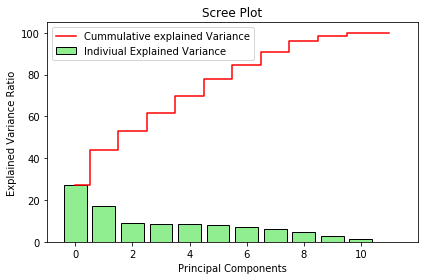

In [44]:
## Scree plot
plt.bar(range(12),var_exp, align='center',color='lightgreen',edgecolor='black',label='Indiviual Explained Variance')
plt.step(range(12), cum_var_exp, where='mid',color='red',label='Cummulative explained Variance')
plt.title('Scree Plot')
plt.legend(loc='best')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.tight_layout()
plt.show()

## 9 PCs explain 95% of the variance

In [45]:
## Fitting the PCA model
pca=PCA(n_components = 10)
pca.fit(scaled_features_df)

PCA(n_components=10)

In [46]:
data_pca = pca.transform(scaled_features_df)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,2.134619,0.507134,-0.230857,1.182211,-0.872806,-0.333764,1.212308,0.023202,-1.501022,0.245608
1,-1.125557,2.123640,-0.330633,0.982421,-0.589575,-0.985178,-0.260907,0.478544,1.081570,-0.020530
2,1.344637,-0.092856,0.346200,-0.372470,0.999301,-0.881543,-0.502429,0.135041,-0.725151,0.389370
3,-2.058567,-1.403194,-0.184199,-0.444759,0.842167,-0.318064,-0.473398,-0.141417,-0.061264,-0.249399
4,-0.166205,-0.868028,0.634700,-1.514712,-0.877164,1.679847,-0.629677,-0.004605,-0.170901,-0.026061


### 16. Apply K-means clustering and segment the data (Use PCA transformed data for clustering)

In [47]:
cluster_range = range(1,15)
cluster_errors = []

for num_clusters in cluster_range:
   
    clusters = KMeans(num_clusters, n_init=10)
    clusters.fit(data_pca)
    
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({'num_clusters':cluster_range, 
                           'cluster_errors':cluster_errors})

clusters_df

,num_clusters,cluster_errors
0,1,26524.017610
1,2,21052.606403
2,3,19080.165009
3,4,16926.396873
4,5,16730.884145
5,6,14601.336434
6,7,13913.605119
7,8,13178.751108
8,9,12666.287898
9,10,12280.225849


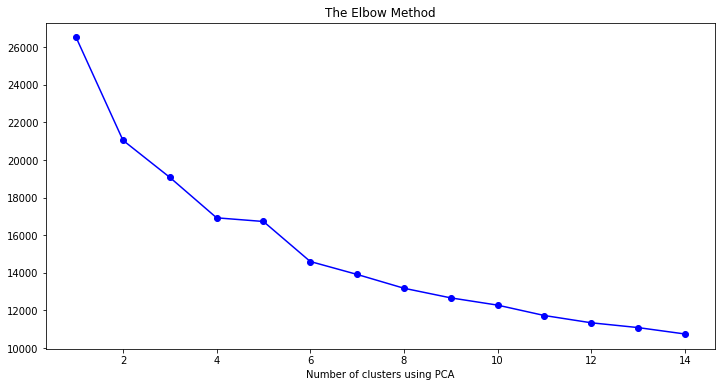

In [48]:
## Elbow method
plt.figure(figsize=[12,6])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters using PCA')
plt.plot(clusters_df['num_clusters'],clusters_df['cluster_errors'],marker='o',color='b')
plt.show()

## at 4 the inertia plateaus
## optimal number of clusters could be 3 or 4

In [52]:
## also validating the number with silhouette score
from sklearn.metrics import silhouette_score

kmeans_score = []

for i in range(2,9):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(data_pca)
    labels = kmeans.predict(data_pca)
    print(i,silhouette_score(data_pca,labels))

2 0.21270703489489393
3 0.22191299725625813
4 0.1365491772593616
5 0.14614810572457243
6 0.1493771246213697
7 0.1481099937163175
8 0.1465594382161178


## silhouette score is max at 3, so taking 3 as optimum number of clusters

In [54]:
## Fit the KMeans clustering model using the obtained optimal K
kmeans = KMeans(n_clusters=3, n_init=10, random_state=2345)
kmeans.fit(data_pca)

KMeans(n_clusters=3, random_state=2345)

In [55]:
## obtained labels from kmeans clustering
kmeans.labels_

array([2, 1, 2, ..., 2, 2, 1], dtype=int32)

In [56]:
## Creating a new dataframe only for labels.
df_labels = pd.DataFrame(kmeans.labels_, columns=list(['Labels']))
df_labels.head(5)

,Labels
0,2
1,1
2,2
3,1
4,1


In [57]:
market_df['label']=df_labels

In [58]:
market_df['label'].value_counts(normalize=True)*100

1    55.803571
2    43.258929
0     0.937500
Name: label, dtype: float64

In [59]:
market_df[market_df['label']==2]['Income'].mean()

71581.96594427245

In [60]:
market_df[market_df['label']==1]['Income'].mean()

37360.0416

In [61]:
market_df[market_df['label']==0]['Income'].mean()

45242.28571428572

In [65]:
kmeans_df=data_pca.join(df_labels)

In [66]:
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Labels
0,2.134619,0.507134,-0.230857,1.182211,-0.872806,-0.333764,1.212308,0.023202,-1.501022,0.245608,2
1,-1.125557,2.123640,-0.330633,0.982421,-0.589575,-0.985178,-0.260907,0.478544,1.081570,-0.020530,1
2,1.344637,-0.092856,0.346200,-0.372470,0.999301,-0.881543,-0.502429,0.135041,-0.725151,0.389370,2
3,-2.058567,-1.403194,-0.184199,-0.444759,0.842167,-0.318064,-0.473398,-0.141417,-0.061264,-0.249399,1
4,-0.166205,-0.868028,0.634700,-1.514712,-0.877164,1.679847,-0.629677,-0.004605,-0.170901,-0.026061,1


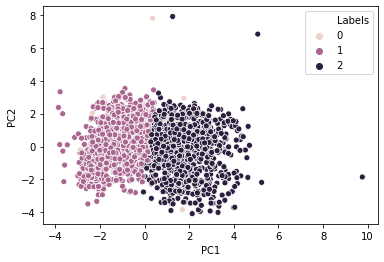

In [68]:
sns.scatterplot(kmeans_df['PC1'],kmeans_df['PC2'],hue='Labels',data=kmeans_df)
plt.show()

### 17. Apply Agglomerative clustering and segment the data (Use Original data for clustering), and perform cluster analysis by doing bivariate analysis between the cluster label and different features and write your observations.

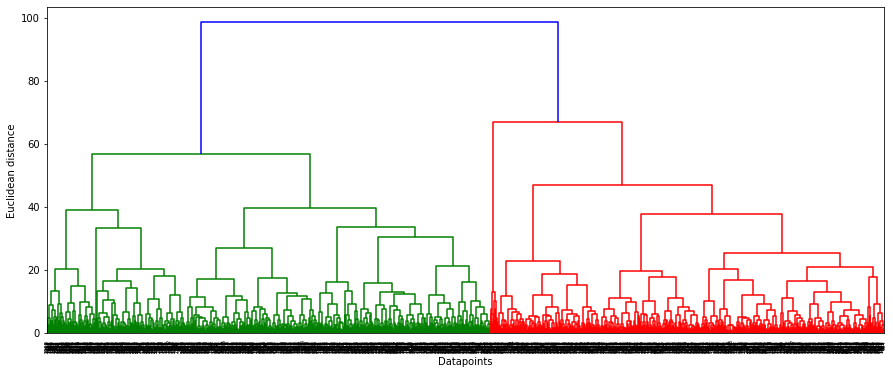

In [62]:
plt.figure(figsize=[15,6])
merg = linkage(data_pca, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean distance')
plt.show()

In [70]:
for i in range(2,9):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(data_pca)
    labels = hier.fit_predict(data_pca)
    print(i,silhouette_score(data_pca,labels))

2 0.18311774594116195
3 0.19007157534850094
4 0.1559800972081911
5 0.11109011271099531
6 0.10639324982442296
7 0.11150608557136513
8 0.10612469084121916


## silhoutte score shows 3 is optimum

In [71]:
## Building hierarchical clustering model using the optimal clusters as 3
hie_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',
                                     linkage='ward')
hie_cluster_model = hie_cluster.fit(data_pca)

In [72]:
## Creating a dataframe of the labels
df_label1 = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
df_label1.head(5)

,Labels
0,0
1,1
2,0
3,1
4,0


In [82]:
df_hier=market_df.join(df_label1)
df_hier


,Year_Birth,Education,Marital_Status,Income,Recency,NumWebVisitsMonth,Complain,Total_Expenses,Num_Total_Purchases,Kids,TotalAcceptedCmp,age,label,Labels
0,1957,2,0,58138.0,58,7,0,1617,25,0,1,65,2,0
1,1954,2,0,46344.0,38,5,0,27,6,2,0,68,1,1
2,1965,2,1,71613.0,26,4,0,776,21,0,0,57,2,0
3,1984,2,1,26646.0,26,6,0,53,8,1,0,38,1,1
4,1981,4,1,58293.0,94,5,0,422,19,1,0,41,1,0
5,1967,3,1,62513.0,16,6,0,716,22,1,0,55,2,0
6,1971,2,0,55635.0,34,6,0,590,21,1,0,51,1,1
7,1985,4,1,33454.0,32,8,0,169,10,1,0,37,1,1
8,1974,4,1,30351.0,19,9,0,46,6,1,1,48,1,1
9,1950,4,1,5648.0,68,20,0,49,2,2,1,72,1,1


### Visualization and Interpretation of results

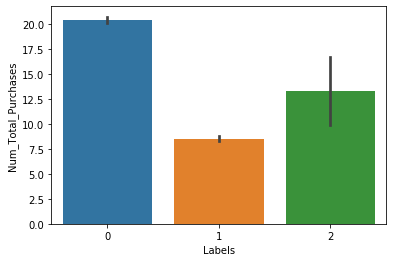

In [83]:
sns.barplot(df_hier['Labels'],df_hier['Num_Total_Purchases'])
plt.show()
                                    

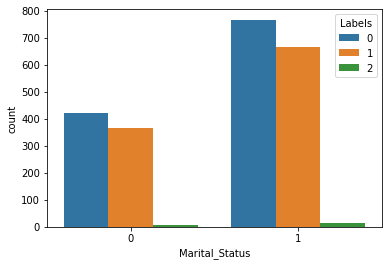

In [84]:
sns.countplot(df_hier['Marital_Status'],hue='Labels',data=df_hier)

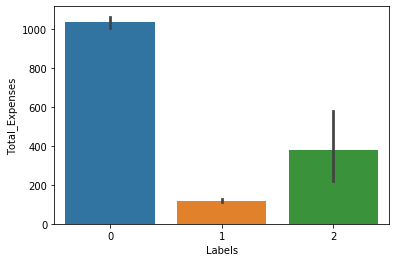

In [85]:
sns.barplot(df_hier['Labels'],df_hier['Total_Expenses'])
plt.show()

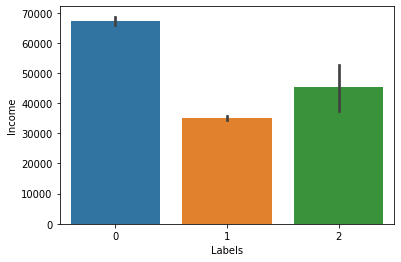

In [86]:
sns.barplot(df_hier['Labels'],df_hier['Income'])
plt.show()

## we can see cluster 0 has highest income & total expenses, followed by cluster 2, and cluster 1

-----
## Happy Learning
-----